# Regresión Lineal - Una primera aproximación con Python


##Introducción

Una de las herramientas de la estadística más ampliamente utilizadas por distintas áreas del conocimiento es la regresión lineal. Este método estadístico es bastante popular tanto por su gran utilidad así como por su fácil implementación, al estar integrado en herramientas como Python, R, Excel, y más. La regresión no solo permite identificar el conjunto de variables (explicativas o predictivas) más relacionadas a una variable de interés (respuesta), pero tambien posibilita hacer predicciones de la variable respuesta a partir de las variables predictivas. 

De manera más general, el análisis de regresión "consiste en ajustar un modelo a los datos, estimando coeficientes a partir de las observaciones, con el fin de predecir valores de la variable de respuesta a partir de una (regresión simple) o más variables (regresión múltiple) predictivas o explicativas." [(Vinuesa, 2016)](https://www.ccg.unam.mx/~vinuesa/R4biosciences/docs/Tema9_regresion.html#regresion-lineal-simple-y-multiple-teoria-y-practica). En particular para el caso de la regresión lineal, la variable respuesta es de caracter continuo y las variables explicativas pueden ser tanto continuas como discretas, además, la relación se modela con una función lineal. 


##Breve historia

Sir Francis Galton fue la persona que originalmente concibió las nociones modernas de correlación y regresión. Su interés por el problema de la herencia lo llevó a estudiar cómo las carácteristicas de una generación de seres vivientes se reflejaba en la siguiente. Su primera aproximación se dió a partir del problema de los guisantes dulces, donde comparó el tamaño de los guisantes padre (variable explicativa) con el tamaño de los hijos (variable respuesta) a partir de una pequeña muestra. Así mismo, más adelante se dió cuenta de la posibilidad de realizar regresión multiple.

En 1896, Karl Pearson puplicó un paper en *Philosophical
Transactions of the Royal Society of London*, donde realizaba un estudio formal de la regresión y la correlación. "Usando una prueba estadística avanzada
(que implica una expansión de Taylor), Pearson demostró que los valores óptimos de la pendiente de regresión y el coeficiente de correlación podría calcularse a partir del momento del producto, $\sum\frac{xy}{n}$, donde $x$ y $y$ son
desviaciones de los valores observados de sus respectivas medias y $n$ es el número de pares." [(Stanton, 2001)](https://doi.org/10.1080/10691898.2001.11910537). Este fue uno de sus resultados más contundentes pero además profundizó en temas adicionales como regresión múltiple y estadísticas como la chi-cuadrado. 


##Planteamiento del algoritmo

### Regresión lineal simple

Como se mencionó anteriormente, la regresión lineal modela una variable de interés a partir de una función lineal. Para el caso de la regresión lineal simple, la ecuación esta dada por

$$
Y=\beta_0+\beta_1X+\epsilon
$$

donde,

*   Y = Variable respuesta 
*   $\beta_0$ = Intercepto
*   $\beta_1$ = Pendiente (escalar)
*   $X$ = Variable explicativa (vector de dimensión $n\times 1$ para el caso simple) 
*   $\epsilon$ = Término de error

Para encontrar el mejor ajuste es necesario hayar los valores óptimos de $\beta_0$ y $\beta_1$ de tal manera que minimice la diferencia entre el valor real y el predicho. Para el caso de la regresion lineal simple se puede emplear mínimos cuadrados ordinarios, proceso mediante el cual se minimiza

$$\sum_{i=1}^n(y_i-\hat{y}_i)$$

donde $y_i$ es la $i$-ésima observacion del vector $Y$ y $\hat{y}_i=\beta_0+\beta_1x_i$ es la $i$-ésima predicción de $Y$. Para realizar esta minimización es necesario derivar la expresión anterior con respecto a $\beta_0$ y $\beta_1$ e igualar a cero, de donde se obtiene que los parámetros óptimos son

$$
\hat{\beta_0}=\bar{X}-\hat{\beta_1}\bar{X}
$$

$$
\hat{\beta_1}=\frac{\sum_{i=1}^n(x_i-\bar{X})(y_i-\bar{Y})}{\sum_{i=1}^n(x_i-\bar{X})^2}
$$

### Regresión lineal múltiple

Para el caso de la regresión lineal múltiple, la ecuación esta dada por

$$
Y=X\beta +\epsilon
$$

donde,

*   Y = Variable respuesta 
*   $\beta$ = Vector de parámetros (de dimensión $(k+1)\times 1$, con $k=$número variables explicativas)
*   $X$ = Matriz de variables explicativas (de dimensión $n\times (k+1)$) 
*   $\epsilon$ = Término de error

Para este caso, encontrar los parámetros óptimos se puede hacer mediante 2 métodos:

1.   De forma analítica (mediante las ecuaciones normales)
2.   Utilizando un algorítmo de optimización (descenso del gradiente, descenso del gradiente estocástico, entre otros)

#### Solución analítica

Tomando las expresiones de forma matricial, se pretende minimizar

$$
(Y-\hat{Y})^t(Y-\hat{Y})=(Y-X\beta)^t(Y-X\beta)
$$

Mediante este método, se debe derivar la expresión anterior con respecto a $\beta$ e igualar a cero. Realizando esto, se optienen las ecuaciones normales

$$X^tX\beta=X^tY$$

Resolviendo la ecuación anterior para $\beta$, y asumiendo que $X^tX$ es invertible, se obtiene que

$$\hat{\beta}=(X^tX)^{-1}X^tY$$

Para conjuntos de datos muy grandes, las operaciones matriciales y principalmente el cálculo de inversas requiere de muchos recursos computacionales, a tal punto que puede resultar incalculable. Es por esto que se considera el siguiente método para resolver este tipo de problemas.

#### Algoritmos de optimización

En este caso se considera el método del descenso del gradiente, empleado con frecuencia para optimizar funciones, variando los parámetros de manera interativa para minimizar alguna función de costo. En este caso, esta función de costo es el error cuadrático medio. Puntualmente, este método "mide el gradiente local de la función de error con respecto al vector de parámetros θ y va en la dirección del gradiente descendente. Una vez que el gradiente es cero, ha alcanzado un mínimo." [(Hariharan, 2020)](https://medium.com/analytics-vidhya/linear-regression-a-complete-story-c5edd37296c8). En este problema, el parámetro de interés es $\beta$. 

Un aspecto fundamental es la elección del hiperparametro de la tasa de aprendizaje, el cual determina que tan largo es el paso que se hace entre iteraciones. [Hariharan](https://medium.com/analytics-vidhya/linear-regression-a-complete-story-c5edd37296c8) expone 3 imagenes que muestran de manera muy intuitiva la importancia de este hiperparámetro.

Saving DG1.png to DG1.png


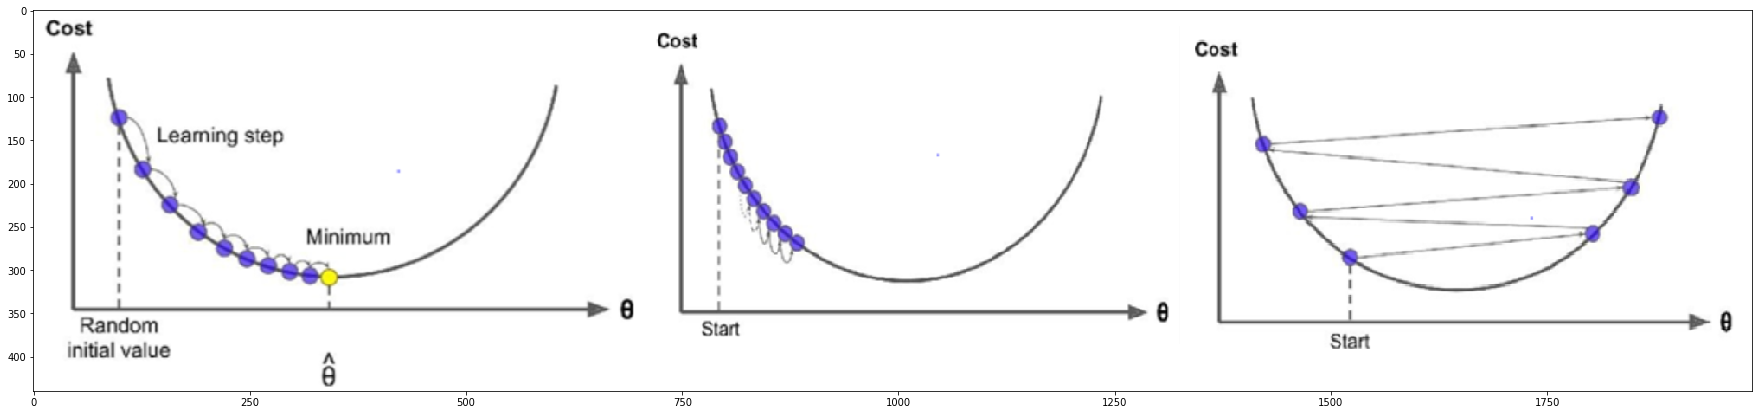

In [1]:
from google.colab import files
from io import BytesIO
from PIL import Image
import matplotlib.pyplot as plt

uploaded = files.upload()
im = Image.open(BytesIO(uploaded['DG1.png']))

plt.figure(figsize = (70,7))
plt.imshow(im, interpolation='nearest')

La primera imagen muestra en qué consiste el procedimiento iterativo, pues empieza de un valor inicial aleatorio y va saltando de acuerdo a la tasa de aprendizaje hasta llegar a un mínimo. En la segunda imagen se observa que si se toma una tasa de aprendizaje muy pequeña, se requeririan muchas iteraciones y disminuiría el rendimiento del algoritmo. Por ultimo, tomar una tasa muy grande podría ocasionar que el proceso diverja, al saltar el mínimo y seguir tomando valores cada vez mas grandes.

Ahora se considera el procedimiento desde una perspectiva matematica. Recordando que la función de costo es el error cuadrático medio, se debe minimizar 

$$
MSE=\frac{1}{n}\sum_{i=1}^n(x_i\beta-y_i)^2
$$

El gradiente de esta función está dado por

$$
\nabla_{\beta}MSE=
 \begin{pmatrix} 
 \frac{\partial}{\partial\beta_0}MSE \\ 
 \frac{\partial}{\partial\beta_1}MSE \\
 \vdots
 \frac{\partial}{\partial\beta_k}MSE
 \end{pmatrix}=
 \frac{2}{n}X^t(X\beta-Y)
$$

Ya con la expresión anterior, la regla para actualizar el parámetro en cada iteración está determinada por

$$
\beta^{(siguiente \enspace paso)}=\beta-\lambda\nabla_{\beta}MSE
$$

donde $\lambda$ es la tasa de aprendizaje.

## Ejemplo con datos reales

Para ilustrar los métodos de regresión lineal y su implementación en Python, se realizará un ejemplo con datos reales. Se utilizará una base de datos que pretende analizar qué propiedades físico químicas del vino mejoran su calidad. La base de datos está asociada a las variantes del vino portugués *Vinho Verde*. [(Cortez, 2009)](https://www.kaggle.com/uciml/red-wine-quality-cortez-et-al-2009). Para este ejemplo se toma como variable respuesta la calidad del vino, dada por un puntaje de 0 a 10 (se asumirá continua) y se utilizan las variables físico químicas observadas más adelante.

In [89]:
from IPython.display import Image
Image(url='https://i1.wp.com/brightestyoungthings.com/wp-content/uploads/2015/03/wine-gif.gif?quality=100&ssl=1')

Ahora, se empiza por importar las librerias necesarias.

In [14]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

Ahora, se importa la base de datos y se observa que se registran 1599 datos y 12 variables (incluida la variable respuesta).

In [55]:
df = pd.read_csv('winequality-red.csv')
df.shape

(1599, 12)

A continuación se muestran las varibles que se incluyen en esta base de datos y las primeras 5 observaciones. La ultima variable, *quality*, será la varible de interés.

In [56]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


Además, es necesario revisar si hay valores faltantes y como se observa, no existe ninguno.

In [58]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

Ahora, se muestran algunas de las estadísticas descriptivas más sencillas de la base a trabajar y cómo se comporta la distribución de las variables mediante histogramas.

In [59]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  This is separate from the ipykernel package so we can avoid doing imports until


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f0d2be9e850>,
      dtype=object)

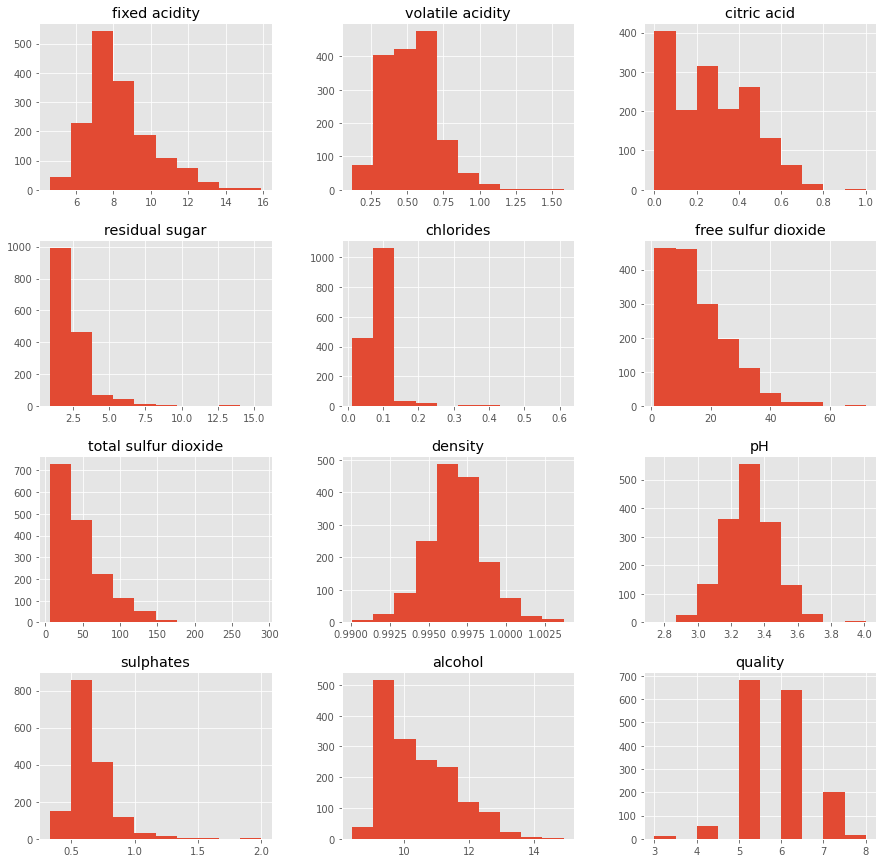

In [60]:
fig = plt.figure(figsize = (15,15))
ax = fig.gca()
df.hist(ax = ax)

De acuerdo a la información anterior, el peor vino tuvo una calificación de 3 y el mejor una de 8. Parece que la mayoria de los vinos tuvieron calificaciones promedio entre 5 y 6. Suponiendo que un buen vino tiene una calificación mayor o igual a 7, se realiza un primer estudio unicamente con la variable *alcohol*.

Se hará una primera regresion lineal simple y se observará como varía la calidad del vino de acuerdo a su cantidad de alcohol. Además, se graficarán de color azul los puntos con una calidad mayor a 7 y de color rojo los demás. Así, se podrá evidenciar de manera gráfica como se distinguen los buenos vinos de los demás a partir de su cantidad de alcohol.

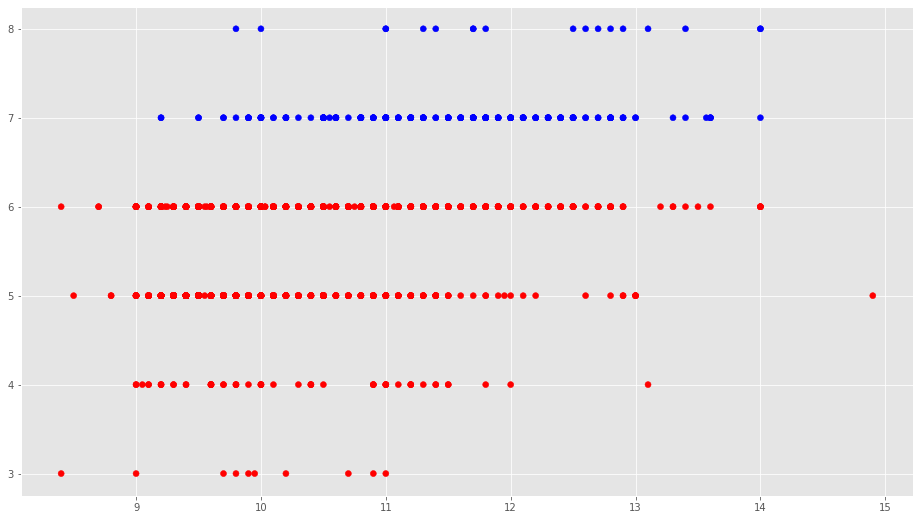

In [72]:
colors=['red','blue']

Calidad = df['quality'].values
Alcohol = df['alcohol'].values
 
asignar=[]
for index, row in df.iterrows():
    if (row['quality']>=7):
        asignar.append(colors[1])    
    else:
        asignar.append(colors[0])
    
plt.scatter(Alcohol, Calidad, c=asignar)
plt.show()

A primera vista parece que menores niveles de alcohol generan menores puntajes de calidad. No hay vinos buenos con un porcentaje de alcohol menor a 9 y los peores vinos no super un 11% de alcohol. Ahora se procede  realizar la regresión lineal simple con estas dos variables. (Procedimiento realizado con la libreria sklearn y basado en [este](https://www.aprendemachinelearning.com/regresion-lineal-en-espanol-con-python/) ejemplo).

In [83]:
trainX = df[["alcohol"]]
AlcoholM = np.array(trainX)

regr = linear_model.LinearRegression()
regr.fit(AlcoholM, Calidad)
 
y_pred = regr.predict(AlcoholM)
 
# Veamos los coeficienetes obtenidos, En nuestro caso, serán la Tangente
print('Coefficients: \n', regr.coef_)
# Este es el valor donde corta el eje Y (en X=0)
print('Independent term: \n', regr.intercept_)
# Error Cuadrado Medio
print("Mean squared error: %.2f" % mean_squared_error(Calidad, y_pred))
# R cuadrado
print('Variance score: %.2f' % r2_score(Calidad, y_pred))

Coefficients: 
 [0.36084177]
Independent term: 
 1.8749748870415583
Mean squared error: 0.50
Variance score: 0.23


El $R^2$ para este modelo es de tan solo un 23%, lo cual se puede mejorar si consideramos una regresion lineal múltiple con el resto de varibales explicativas disponibles. De acuerdo al modelo anterior, una cantidad de 15 de alcohol generaría un vino con 7.3 puntos de calidad, sin embargo, esta predicción puede no ser muy adecuada al haber considerado solo una variable explicativa.

In [78]:
pred = regr.predict([[15]])
print(pred)

[7.28760137]


In [84]:
trainXs = df.loc[:,df.columns!='quality']
VarM = np.array(trainXs)

regr = linear_model.LinearRegression()
regr.fit(VarM, Calidad)
 
y_pred = regr.predict(VarM)
 
# Veamos los coeficienetes obtenidos, En nuestro caso, serán la Tangente
print('Coefficients: \n', regr.coef_)
# Error Cuadrado Medio
print("Mean squared error: %.2f" % mean_squared_error(Calidad, y_pred))
# Puntaje de Varianza. El mejor puntaje es un 1.0
print('Variance score: %.2f' % r2_score(Calidad, y_pred))

Coefficients: 
 [ 2.49905527e-02 -1.08359026e+00 -1.82563948e-01  1.63312698e-02
 -1.87422516e+00  4.36133331e-03 -3.26457970e-03 -1.78811638e+01
 -4.13653144e-01  9.16334413e-01  2.76197699e-01]
Mean squared error: 0.42
Variance score: 0.36


Es bastante interesante observar cómo al añadir 10 variables adicionales no hay una mejora considerable en el $R^2$, pues antes era del 23% y ahora sólo aumentó a un 36%. Esto seguramente se deba a que muchas de estas variables aportan la misma información a la varible respuesta y no mejoran casi nada el desempeño del modelo. Para entender un poco más esta variable respuesta se podrían registrar otras caracteristicas del vino que puedan afectar su calidad, o tal vez optar por otro tipo de modelamiento como los no lineales.

## Conclusiones

A pesar de que existen librerias como *sklearn* que tienen implementados todos los procesos necesarios para realizar regresiones lineales, es importante entender los procedimientos que se realizan internamente en los programas. Esto no sólo facilita la interpretación correcta de los resultados sino que también ayuda a comprender por qué la regresión lineal puede ser la herramienta adecuada para el tratamiento de algún conjunto de datos. En general, la regresión lineal es una herramienta bastante útil, pero en muchos casos no la más adecuada. Siempre es necesario un análisis de la base a estudiar para conocer qué variables puedo tomar como explicativas y si efectivamente se pueden modelar mediante una regresión lineal. En los problemas de la vida real ocurre con poca frecuencia que una regresión lineal simple sea suficiente para describir una variable, sin embargo, más variables explicativas no traducen en un mejor modelo (depende de qué tan eficientes sean estas para describir la variable de interés). Un caso particular de esto es el problema del vino expuesto anteriormente, pues 10 variables adicionales no lograron ni siquiera duplicar la efectividad del modelo que había coseguido una sola variable.

## Bibliografía

1.   Vinuesa, P. (2016). *Tema 9 - Regresión lineal simple y polinomial: teoría y práctica*, CCG-UNAM. Disponible en: https://www.ccg.unam.mx/~vinuesa/R4biosciences/docs/Tema9_regresion.html#regresion-lineal-simple-y-multiple-teoria-y-practica.
2.   Jeffrey M. Stanton (2001). *Galton, Pearson, and the Peas: A Brief History
of Linear Regression for Statistics Instructors*, Journal of Statistics Education, 9:3. Disponible en: https://doi.org/10.1080/10691898.2001.11910537.
3.   Hariharan. (2020). *Linear Regression: A complete story. Everything you need to know about regression analysis.* Disponible en: https://medium.com/analytics-vidhya/linear-regression-a-complete-story-c5edd37296c8
4.   P. Cortez, A. Cerdeira, F. Almeida, T. Matos and J. Reis. (2009). *Modeling wine preferences by data mining from physicochemical properties.* In Decision Support Systems, Elsevier, 47(4):547-553. Disponible en: https://www.kaggle.com/uciml/red-wine-quality-cortez-et-al-2009
5.   (2018). *Regresión Lineal en español con Python* Disponible en: https://www.aprendemachinelearning.com/regresion-lineal-en-espanol-con-python/

